<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Proyecto_final/Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLACIFICACION DE EMOCIONES
#PROYECTO FINAL -- MACHINE LEARNING
###CARLOS LEONEL GUERRERO RODRIGUEZ  314570



#Introducción:
Las expresiones faciales son elementos fundamentales de la comunicación humana, proporcionando valiosa información sobre estados emocionales. En el ámbito del machine learning, el análisis de estas expresiones se traduce en aplicaciones significativas. Desde el reconocimiento automático de emociones en interfaces inteligentes hasta la detección de signos tempranos de estrés en salud mental, el entendimiento de las expresiones faciales amplía las capacidades de sistemas adaptativos, mejorando la interacción humano-computadora y la toma de decisiones automatizada en diversas áreas.






# Objetivo Principal:
Desarrollar una red neuronal para analizar imágenes de rostros humanos y clasificar emociones en las categorías angry, disgust, neutral, happy, sad, surprise, fear.

El entrenamiento se realizará con una base de datos específica de expresiones faciales, buscando alcanzar un modelo preciso y robusto en la identificación automática de emociones en las imágenes. El proyecto se enfoca en la implementación de técnicas de machine learning para mejorar la capacidad de la red en la generalización y reconocimiento de patrones asociados a diferentes estados emocionales, contribuyendo a la comprensión automatizada de la expresión facial.

**Metodología: Desarrollo y Evaluación de la Red Neuronal Convolucional (CNN)**

1. **Tamaño de Lote:**
   - El tamaño de lote se refiere a la cantidad de ejemplos de entrenamiento que se utilizan en una iteración. En este proyecto, se estableció un tamaño de lote de 32. Este parámetro influye en la cantidad de datos que la red procesa antes de actualizar sus pesos internos durante el entrenamiento.

2. **Número de Épocas:**
   -  Se llevaron a cabo varios entrenamientos, cada uno con un número diferente de épocas, incluyendo 10, 20, 30, 40, y 50 épocas. Este parámetro influye en la capacidad de la red para aprender patrones en los datos y puede afectar la generalización del modelo.

3. **Tamaño de la Imagen de Entrada:**
   -  En este proyecto, las imágenes se redimensionaron a (28, 28) píxeles. Reducir la resolución de las imágenes ayuda a acelerar el proceso de entrenamiento y reduce la complejidad del modelo, lo que puede ser beneficioso para conjuntos de datos más grandes.

   Originalmente empece tomando a (128, 128) pero tomaba demasiado tiempo en compilar, por lo que tuve que reajustar.

**Funciones de Activación:**
- En la capa convolucional, se utilizó la función de activación ReLU (Rectified Linear Unit). La función ReLU es comúnmente utilizada en capas convolucionales para introducir no linealidades en el modelo y ayudar en la convergencia.
- La última capa de la red utilizó la función de activación softmax. Softmax se utiliza para problemas de clasificación multiclase y asigna probabilidades a cada clase, asegurando que la suma de todas las probabilidades sea igual a uno. Esto facilita la interpretación de las salidas como probabilidades.

**Optimizador:**
- Se eligió el optimizador Adam para el entrenamiento de la CNN. Adam combina las ventajas de dos optimizadores anteriores (RMSprop y Momentum) y es conocido por su eficiencia y rapidez de convergencia en problemas de aprendizaje profundo. Adam ajusta automáticamente las tasas de aprendizaje durante el entrenamiento, lo que puede ser beneficioso para la convergencia en diferentes partes del espacio de parámetros.

#Librerias

In [ ]:
import pandas as pd
import glob as gb
import scipy
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import numpy as np
import cv2
import keras
from PIL import Image

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator



#Acceso a datos

En la sección de extracción de datos, los conjuntos de datos utilizados fueron obtenidos de la base de datos FER-2013, disponible en la plataforma Kaggle en el siguiente enlace: [FER-2013 Dataset](https://www.kaggle.com/datasets/msambare/fer2013). Esta base de datos consiste en expresiones faciales etiquetadas en las categorías angry, disgust, neutral, happy, sad, surprise, fear.

Cabe destacar que los datos ya venían predivididos en conjuntos de prueba y entrenamiento, organizados en carpetas individuales para cada categoría emocional. Los conjuntos fueron descargados directamente al computador en lugar de utilizar Google Drive, ya que esta opción resultó ser más eficiente y rápida al trabajar desde Jupyter Notebook. Este enfoque facilitó la organización y acceso a los datos durante el desarrollo del proyecto.

In [ ]:
TRAIN_DIR = "C:\\Users\\Leonel\\Desktop\\train"
TEST_DIR = "C:\\Users\\Leonel\\Desktop\\test"
TAMANO_LOTE = 32

Este fragmento de código analiza la distribución de imágenes en el conjunto de entrenamiento, indicando cuántas imágenes se encuentran en cada subcarpeta que representa una emoción específica. Esta información es valiosa para evaluar la disponibilidad de datos en cada categoría emocional durante la fase inicial de exploración de datos.

In [ ]:
for carpeta in os.listdir(TRAIN_DIR):
    archivos = gb.glob(pathname=str(TRAIN_DIR + '/' + carpeta + '/*.jpg'))
    print(f'Para datos de entrenamiento, se encontraron {len(archivos)} en la carpeta {carpeta}')


Para datos de entrenamiento, se encontraron 3995 en la carpeta angry
Para datos de entrenamiento, se encontraron 436 en la carpeta disgust
Para datos de entrenamiento, se encontraron 4097 en la carpeta fear
Para datos de entrenamiento, se encontraron 7215 en la carpeta happy
Para datos de entrenamiento, se encontraron 4965 en la carpeta neutral
Para datos de entrenamiento, se encontraron 4830 en la carpeta sad
Para datos de entrenamiento, se encontraron 3171 en la carpeta surprise


In [ ]:
for carpeta in os.listdir(TEST_DIR):
    archivos = gb.glob(pathname=str(TEST_DIR + '/' + carpeta + '/*.jpg'))
    print(f'Para datos de prueba, se encontraron {len(archivos)} en la carpeta {carpeta}')


Para datos de prueba, se encontraron 958 en la carpeta angry
Para datos de prueba, se encontraron 111 en la carpeta disgust
Para datos de prueba, se encontraron 1024 en la carpeta fear
Para datos de prueba, se encontraron 1774 en la carpeta happy
Para datos de prueba, se encontraron 1233 en la carpeta neutral
Para datos de prueba, se encontraron 1247 en la carpeta sad
Para datos de prueba, se encontraron 831 en la carpeta surprise


Esta función simplifica la tarea de visualizar una imagen aleatoria de una categoría específica, proporcionando además detalles sobre la forma de la imagen. Su utilidad radica en la fase inicial de exploración de datos, ofreciendo una vista preliminar de las imágenes disponibles en el conjunto de datos.

In [ ]:
def ver_imagen_aleatoria(directorio_objetivo, clase_objetivo):
    # Vamos a ver imágenes desde aquí
    carpeta_objetivo = os.path.join(directorio_objetivo, clase_objetivo)  # Utiliza os.path.join para la construcción de la ruta

    # Obtiene una ruta de imagen aleatoria
    imagen_aleatoria = random.sample(os.listdir(carpeta_objetivo), 1)

    # Lee la imagen y plótala usando matplotlib
    img = mpimg.imread(os.path.join(carpeta_objetivo, imagen_aleatoria[0]))  # Utiliza os.path.join para la construcción de la ruta
    plt.imshow(img)
    plt.title(clase_objetivo)
    plt.axis('off')
    print(f"Forma de la imagen {img.shape}")

    return img


In [ ]:
nombres_clases =['angry', 'disgust', 'neutral', 'happy', 'sad', 'surprise','fear']


Este código genera una presentación visual rápida y aleatoria de 18 imágenes que representan diversas expresiones emocionales.

Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)


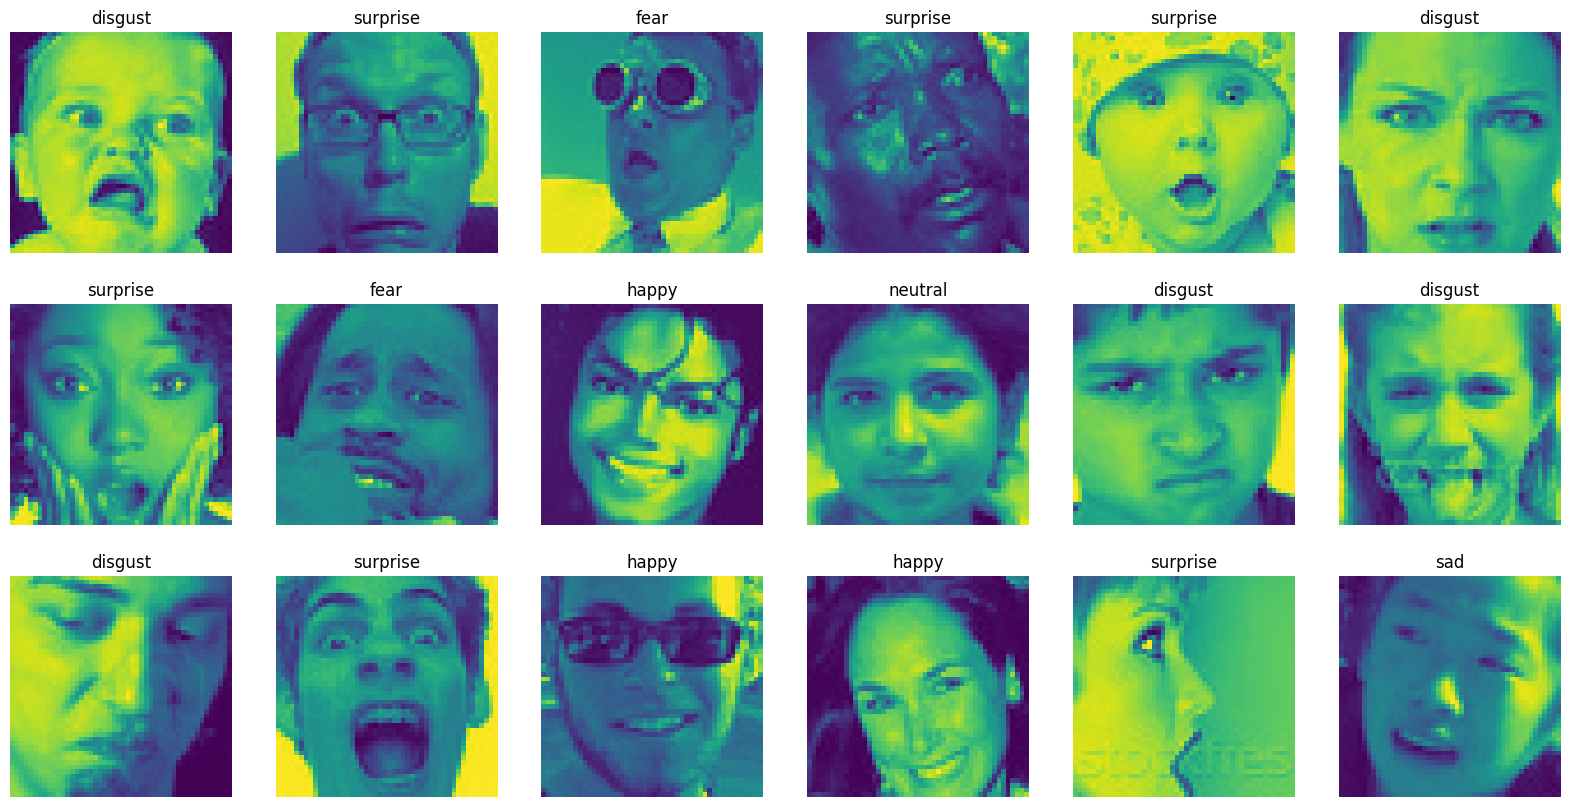

In [ ]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    nombre_clase = random.choice(nombres_clases)
    img = ver_imagen_aleatoria(directorio_objetivo="C:\\Users\\Leonel\\Desktop\\train", clase_objetivo=nombre_clase)

plt.show()


Utilizando la clase `ImageDataGenerator` de Keras para el conjunto de entrenamiento y prueba. En el generador de entrenamiento, se aplican transformaciones como escalado, sesgo, zoom y volteo horizontal a las imágenes para aumentar la variabilidad del conjunto de datos.

Las imágenes se redimensionan a un tamaño específico (28x28 píxeles) y se agrupan en lotes de un tamaño determinado. El conjunto de entrenamiento y prueba se genera a partir de directorios de imágenes organizados por clases, con las etiquetas categorizadas para su uso en la clasificación. Las imágenes se escalan normalizando los valores de píxeles en el rango [0, 1]. Este proceso facilita el entrenamiento de la red convolucional neuronal (CNN) en lotes de datos aumentados y prepara los datos para el proceso de aprendizaje.

In [ ]:
# Configuración del generador de datos para el conjunto de entrenamiento
generador_entrenamiento = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

# Configuración del generador de datos para el conjunto de prueba
generador_prueba = ImageDataGenerator(rescale=1./255)

# Generador de datos para el conjunto de entrenamiento
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory(TRAIN_DIR,
                                                                     target_size=(28, 28),
                                                                     batch_size=TAMANO_LOTE,
                                                                     class_mode='categorical')

# Generador de datos para el conjunto de prueba
conjunto_prueba = generador_prueba.flow_from_directory(TEST_DIR,
                                                       target_size=(28, 28),
                                                       batch_size=TAMANO_LOTE,
                                                       class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#CNN

1. **Capa de Convolución (Conv2D):** Con 16 filtros de 3x3, activados por la función ReLU. Esta capa procesa las características locales de la imagen.

2. **Capa de Pooling (MaxPooling2D):** Realiza un muestreo máximo con una ventana de 2x2 para reducir el tamaño de la representación espacial y los parámetros de la red.

3. **Segunda Capa de Convolución (Conv2D):** Con 32 filtros de 3x3, también activados por la función ReLU. Ayuda a extraer características más complejas de la imagen.

4. **Segunda Capa de Pooling (MaxPooling2D):** Al igual que la primera capa de pooling, reduce aún más el tamaño de la representación espacial.

5. **Capa de Aplanamiento (Flatten):** Transforma la matriz 2D resultante de las capas convolucionales y de pooling en un vector 1D.

6. **Capa de Conexión Total (Dense):** Con 28 unidades y activada por la función ReLU, esta capa realiza una conexión total para aprender patrones de características más abstractas.

7. **Capa de Salida (Dense):** Con 7 unidades (una por cada clase de emoción) y activada por la función softmax. Proporciona la probabilidad de que la entrada pertenezca a cada clase.


In [ ]:
# Inicializando la CNN
clasificador = Sequential()

# Paso 1 - Convolución
clasificador.add(Conv2D(16, (3, 3), input_shape=(28, 28, 3), activation='relu'))

# Paso 2 - Pooling
clasificador.add(MaxPooling2D(pool_size=(2, 2)))

# Agregando una segunda capa de convolución
clasificador.add(Conv2D(32, (3, 3), activation='relu'))
clasificador.add(MaxPooling2D(pool_size=(2, 2)))

# Paso 3 - Aplanamiento
clasificador.add(Flatten())

# Paso 4 - Conexión total
clasificador.add(Dense(units=28, activation='relu'))
clasificador.add(Dense(units=7, activation='softmax'))

# Compilando la CNN
clasificador.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Resumen del modelo
clasificador.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 28)                2

Red neuronal en varias épocas diferentes, especificadas en la lista `epochs_list`. Durante cada iteración, el modelo se entrena con el conjunto de entrenamiento (`conjunto_entrenamiento`) y se valida con el conjunto de prueba (`conjunto_prueba`). Los historiales de entrenamiento, que contienen información sobre la pérdida y la precisión durante el entrenamiento y la validación, se almacenan en un diccionario llamado `historias`. Cada historial está etiquetado con el número de épocas correspondiente.

Después de entrenar el modelo para un número específico de épocas, se guarda el modelo entrenado en un archivo con el formato "modeloX.h5", donde X es el número de épocas.

In [ ]:


# Lista de épocas deseadas
epochs_list = [10, 20, 30, 40, 50]

# Diccionario para almacenar los historiales
historias = {}

# Iterar sobre las épocas
for epochs in epochs_list:
    # Entrenar el modelo y guardar el historial
    historias[f'historia{epochs}'] = clasificador.fit(conjunto_entrenamiento, epochs=epochs, validation_data=conjunto_prueba)

    # Guardar el modelo
    model_filename = f'modelo{epochs}.h5'
    clasificador.save(model_filename)

    print(f'Modelo entrenado con {epochs} épocas y guardado como {model_filename}')

# Acceder a los historiales individualmente, por ejemplo, para 10 épocas
historia_10_epochs = historias['historia10']


Epoch 1/10


898/898 [==============================] - 78s 83ms/step - loss: 1.7286 - accuracy: 0.3076 - val_loss: 1.6197 - val_accuracy: 0.3679
Epoch 2/10
898/898 [==============================] - 74s 83ms/step - loss: 1.5987 - accuracy: 0.3746 - val_loss: 1.5180 - val_accuracy: 0.4140
Epoch 3/10
898/898 [==============================] - 74s 83ms/step - loss: 1.5474 - accuracy: 0.4011 - val_loss: 1.4918 - val_accuracy: 0.4241
Epoch 4/10
898/898 [==============================] - 74s 83ms/step - loss: 1.5108 - accuracy: 0.4167 - val_loss: 1.4617 - val_accuracy: 0.4349
Epoch 5/10
898/898 [==============================] - 75s 83ms/step - loss: 1.4820 - accuracy: 0.4274 - val_loss: 1.4352 - val_accuracy: 0.4487
Epoch 6/10
898/898 [==============================] - 75s 83ms/step - loss: 1.4641 - accuracy: 0.4371 - val_loss: 1.4351 - val_accuracy: 0.4387
Epoch 7/10
898/898 [==============================] - 75s 84ms/step - loss: 1.4497 - accuracy: 0.4421 - val_loss: 1.4263 - val_accurac

C:\Users\Leonel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
898/898 [==============================] - 73s 82ms/step - loss: 1.4011 - accuracy: 0.4641 - val_loss: 1.3819 - val_accuracy: 0.4668
Epoch 2/20
898/898 [==============================] - 74s 83ms/step - loss: 1.3942 - accuracy: 0.4666 - val_loss: 1.3749 - val_accuracy: 0.4667
Epoch 3/20
898/898 [==============================] - 74s 82ms/step - loss: 1.3794 - accuracy: 0.4726 - val_loss: 1.3659 - val_accuracy: 0.4741
Epoch 4/20
898/898 [==============================] - 75s 83ms/step - loss: 1.3724 - accuracy: 0.4772 - val_loss: 1.3762 - val_accuracy: 0.4734
Epoch 5/20
898/898 [==============================] - 75s 83ms/step - loss: 1.3658 - accuracy: 0.4763 - val_loss: 1.3592 - val_accuracy: 0.4792
Epoch 6/20
898/898 [==============================] - 75s 83ms/step - loss: 1.3679 - accuracy: 0.4758 - val_loss: 1.3525 - val_accuracy: 0.4781
Epoch 7/20
898/898 [==============================] - 75s 83ms/step - loss: 1.3570 - accuracy: 0.4798 - val_loss: 1.3629 - val_accuracy:

In [ ]:
clasificador.evaluate(conjunto_prueba)


225/225 [==============================] - 5s 22ms/step - loss: 1.3101 - accuracy: 0.5143


[1.3101097345352173, 0.5143494009971619]

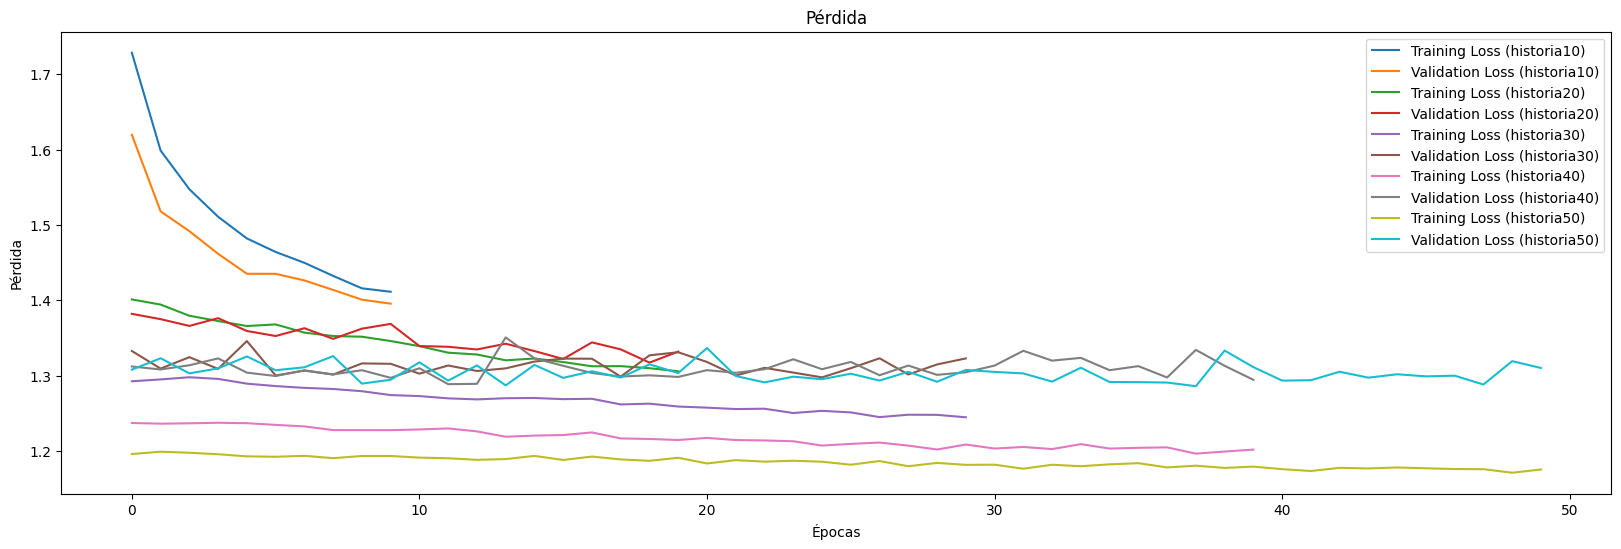

In [ ]:
plt.figure(figsize=(20, 6))
for key, historia in historias.items():
    plt.plot(historia.history['loss'], label=f'Training Loss ({key})')
    plt.plot(historia.history['val_loss'], label=f'Validation Loss ({key})')

plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


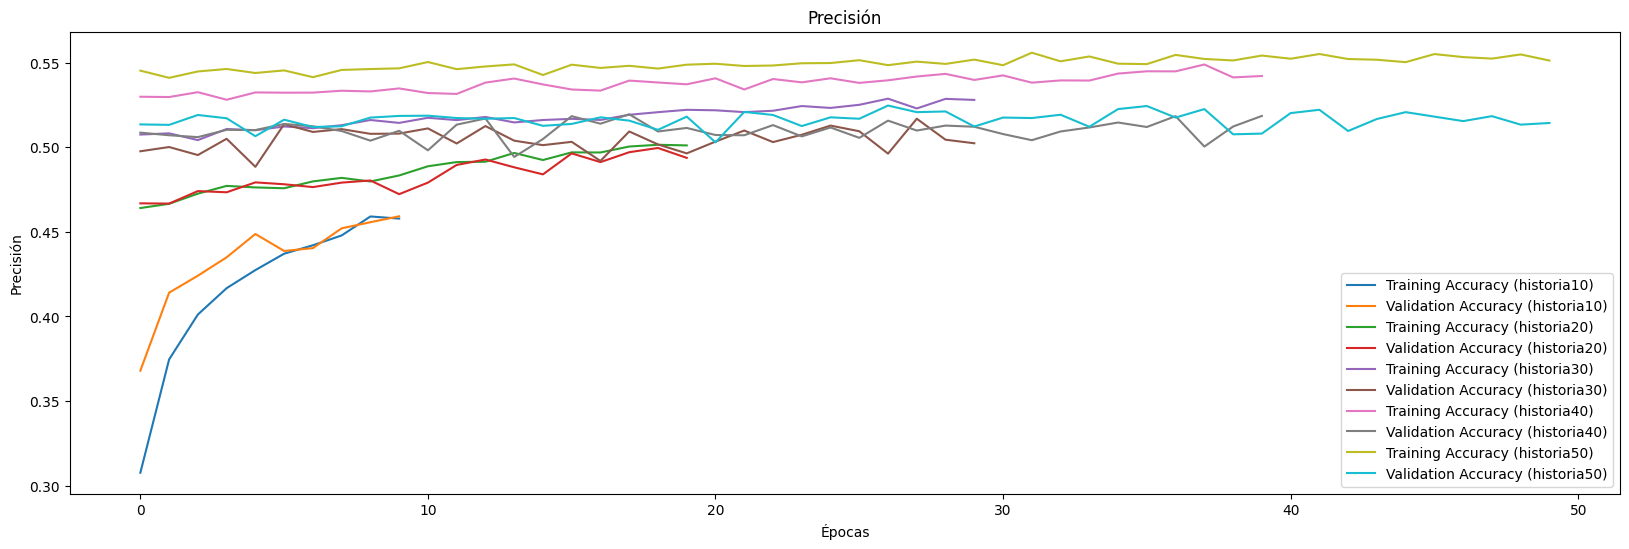

In [ ]:
plt.figure(figsize=(20, 6))
for key, historia in historias.items():
    plt.plot(historia.history['accuracy'], label=f'Training Accuracy ({key})')
    plt.plot(historia.history['val_accuracy'], label=f'Validation Accuracy ({key})')

plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

Este fragmento de código tiene como objetivo la visualización de las predicciones generadas por varios modelos de una red neuronal, los cuales fueron entrenados con diferentes números de épocas. Utilizando modelos preentrenados para cada cantidad específica de épocas, se selecciona de manera aleatoria una imagen de cada categoría emocional del conjunto de datos de entrenamiento. Posteriormente, para cada modelo, se presenta la imagen seleccionada junto con la probabilidad predicha para cada clase emocional en forma de una gráfica de barras. Este enfoque facilita la observación de la evolución en la certeza de las predicciones a medida que se incrementa el número de épocas de entrenamiento.

1/1 [==============================] - 0s 144ms/step


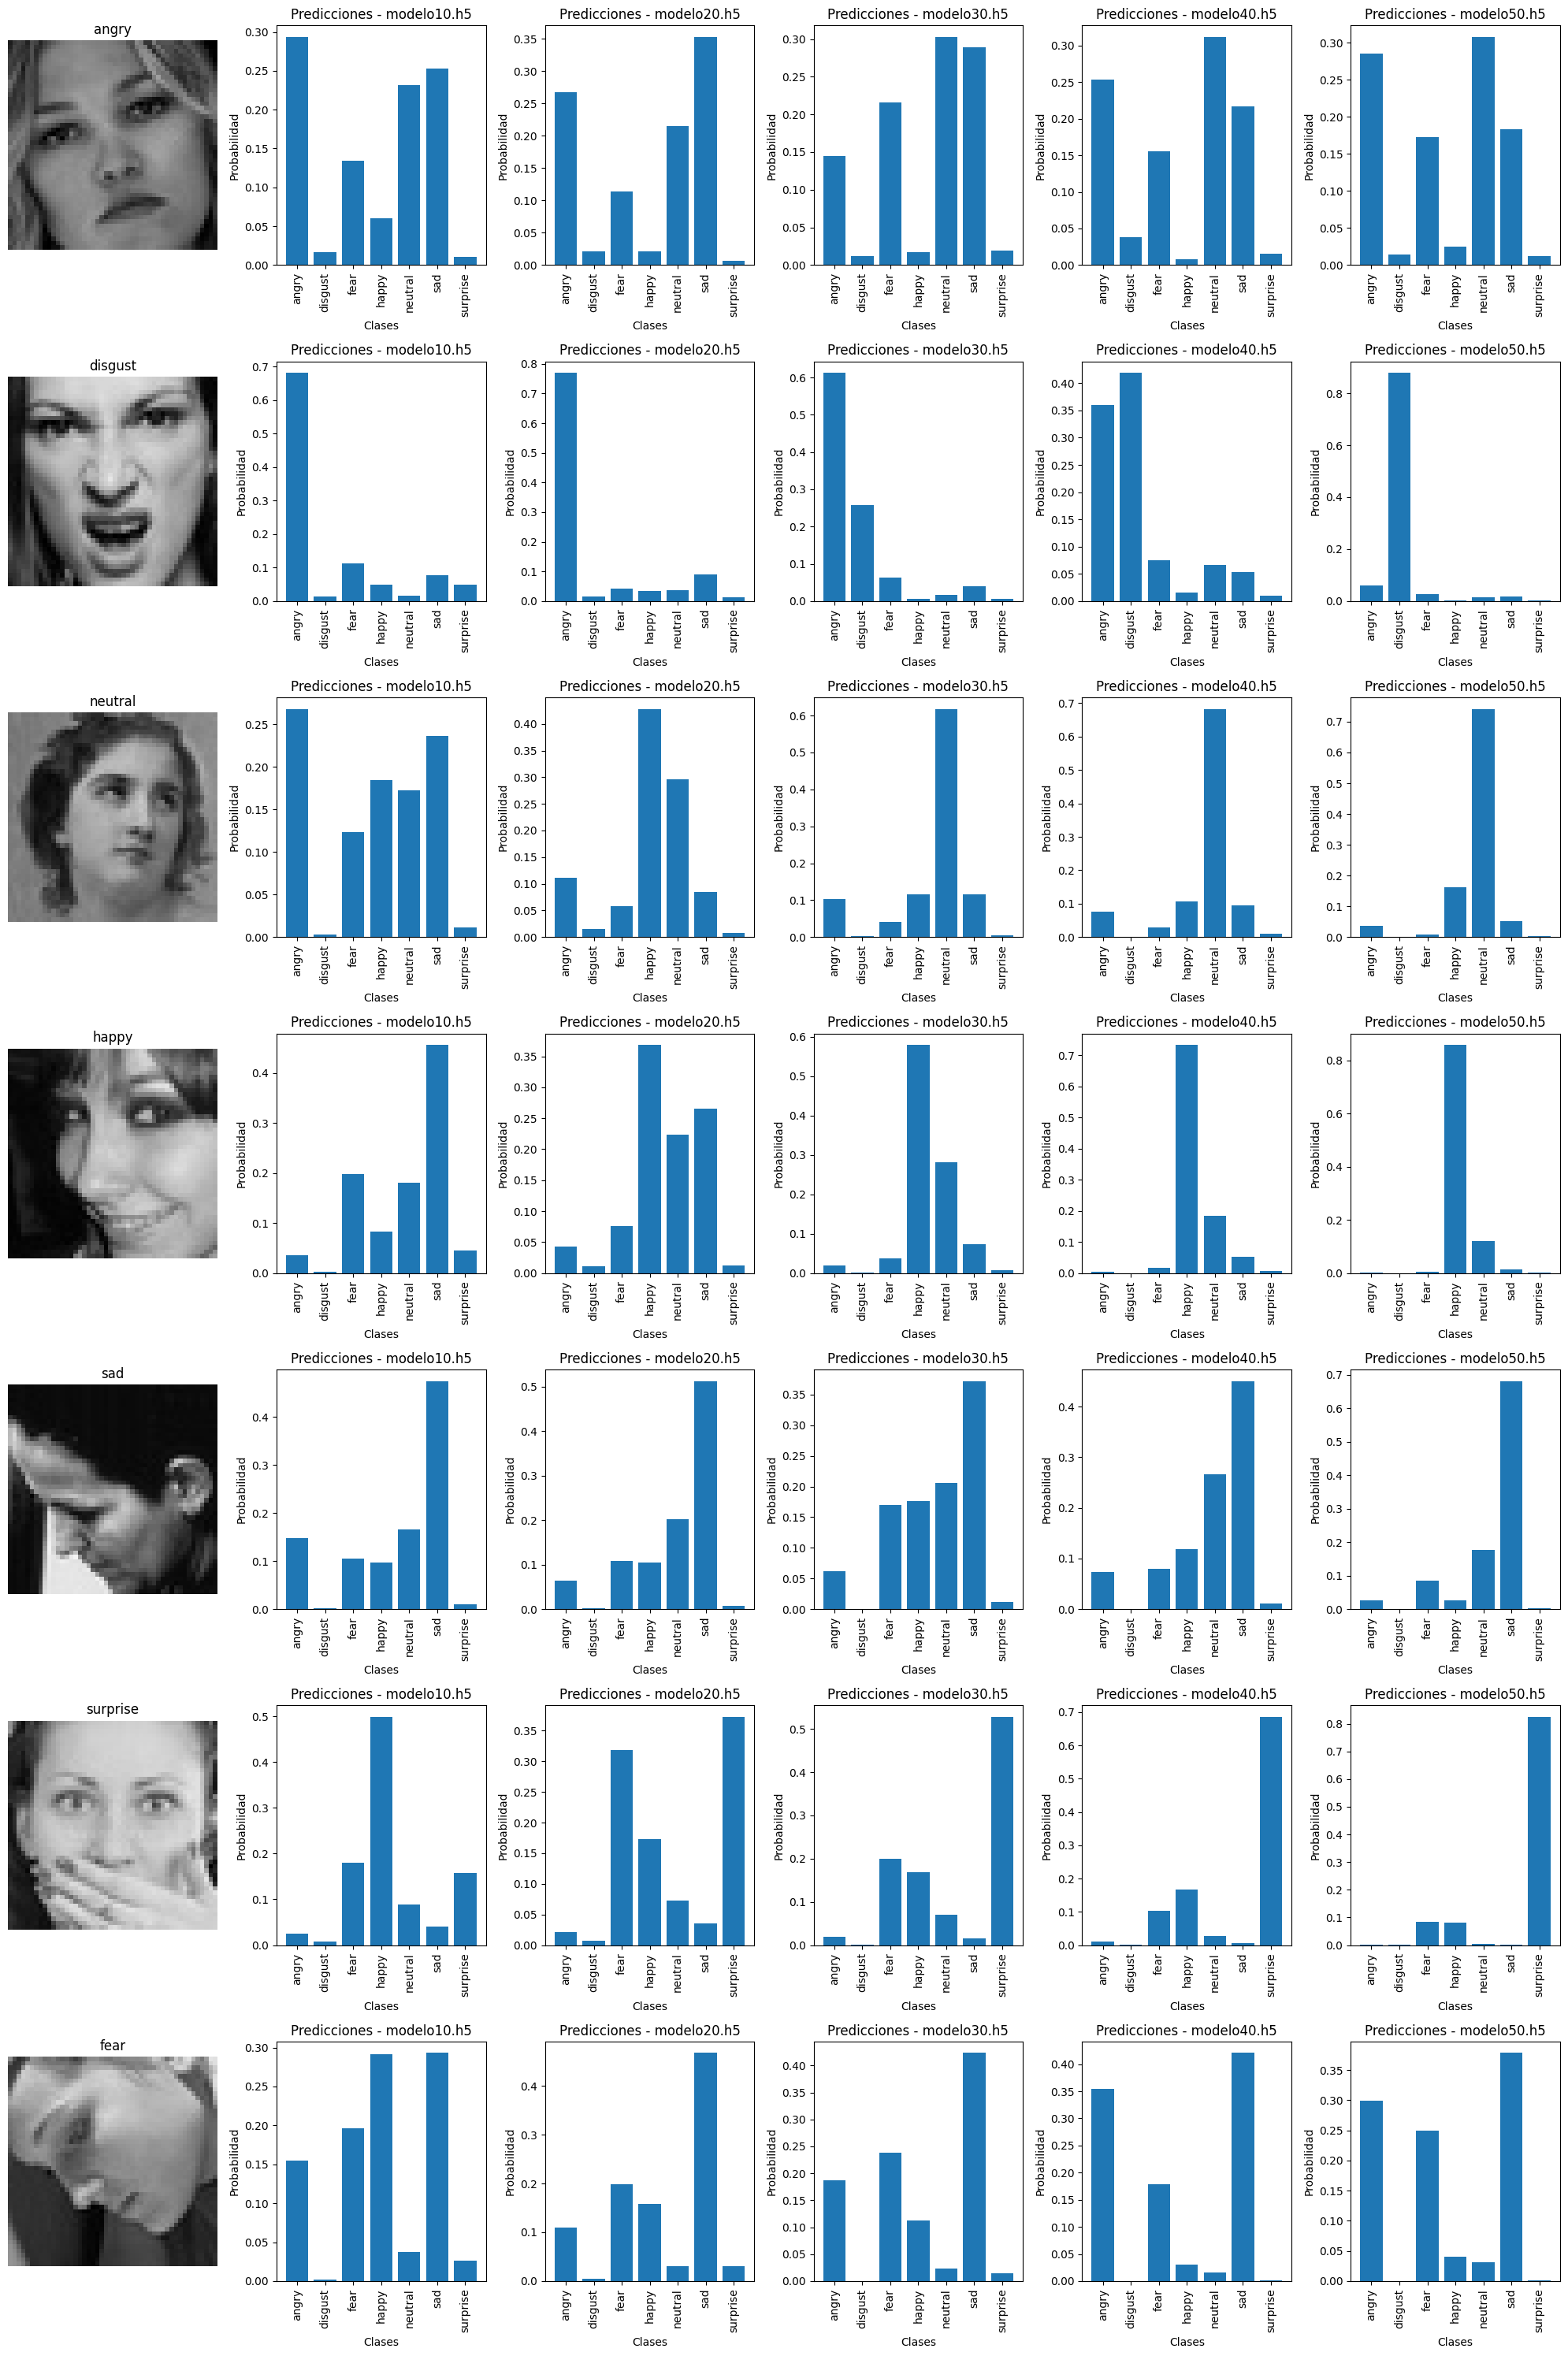

In [ ]:
# Semilla para reproducibilidad
semilla = 32
random.seed(semilla)
np.random.seed(semilla)

# Lista de modelos
modelos = ['modelo10.h5', 'modelo20.h5', 'modelo30.h5', 'modelo40.h5', 'modelo50.h5']

# Directorios de las imágenes
directorios = ['angry', 'disgust', 'neutral', 'happy', 'sad', 'surprise', 'fear']

# Ruta a la carpeta principal
ruta_carpeta = "C:\\Users\\Leonel\\Desktop\\train"

# Diccionario de índices de clases
indices_clases = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

# Invertir el diccionario de índices de clases para obtener el nombre de la clase a partir del índice
clases_indices = {v: k for k, v in indices_clases.items()}

fig, axs = plt.subplots(7, len(modelos)+1, figsize=(20, 30))

# Iterar sobre cada directorio
for i, directorio in enumerate(directorios):
    # Obtener la lista de todas las imágenes en el directorio
    imagenes = os.listdir(os.path.join(ruta_carpeta, directorio))

    random.seed(semilla)
    # Seleccionar 1 imagen aleatoria
    imagen_seleccionada = random.choice(imagenes)

    # Leer la imagen una sola vez
    imagen = cv2.imread(os.path.join(ruta_carpeta, directorio, imagen_seleccionada))
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen a la izquierda
    axs[i, 0].imshow(imagen_rgb)
    axs[i, 0].set_title(f'{directorio}')
    axs[i, 0].axis('off')  # Desactivar los ejes

    # Iterar sobre cada modelo
    for k, modelo in enumerate(modelos):
        # Cargar el modelo
        modelo_cargado = keras.models.load_model(modelo)

        # Convertir la imagen a un array y redimensionarla
        imagen_desde_array = Image.fromarray(imagen_rgb, 'RGB')
        imagen_redimensionada = imagen_desde_array.resize((28, 28))

        # Preparar los datos de entrada para el modelo
        entrada_expandida = np.expand_dims(imagen_redimensionada, axis=0)
        datos_entrada = np.array(entrada_expandida)
        datos_entrada = datos_entrada / 255

        # Hacer una predicción con el modelo
        prediccion = modelo_cargado.predict(datos_entrada)

        # Crear la gráfica de barras de las predicciones
        axs[i, k+1].bar(indices_clases.keys(), prediccion[0])
        axs[i, k+1].set_title(f'Predicciones - {modelo}')
        axs[i, k+1].set_xlabel('Clases')
        axs[i, k+1].set_ylabel('Probabilidad')
        axs[i, k+1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


#Conclusión
En conclusión, al analizar los modelos entrenados con diversas cantidades de épocas, se observa una variación significativa en la capacidad de reconocimiento de distintas emociones. La emoción "angry" presenta mayores desafíos, ya que tiende a confundirse considerablemente con las emociones "neutral", "fear" y "sad". Sin embargo, se destaca que, para modelos con 40 y 50 épocas, la predicción correcta se inclina hacia la segunda opción, marcando una mejora respecto a modelos con menos épocas.

En el caso de "disgust", se identifica una confusión notable en modelos con 30 épocas, pero a partir de las 40 épocas, se logra una diferenciación más clara de esta emoción respecto a "angry". Por otro lado, "neutral" y "happy" muestran un incremento progresivo en la precisión de sus predicciones, destacándose una distinción significativa a partir de las 20 épocas.

La emoción "sad" se diferencia bien desde modelos con 10 épocas, mejorando con el tiempo, mientras que "surprise" se destaca por su fácil identificación desde las primeras épocas, posiblemente debido a patrones más distintivos, como la presencia de manos en el rostro en las imágenes correspondientes a esta emoción. Estos hallazgos sugieren la importancia del número de épocas en el entrenamiento para la mejora progresiva en la capacidad de reconocimiento de diferentes expresiones emocionales.


#Bibliografia


https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

https://keras.io/getting_started/

https://docs.python.org/3/library/os.html

https://www.tensorflow.org/about/bib

https://pypi.org/project/biblib/

https://pillow.readthedocs.io/